## Data collection and processing of the GBR

Questions:
- What do they contain that is different ? // The GBR Oliver files
- It does not recognize ".prj" file --> Needs conversion to proj4 file [DONE]

- For Copernicus I can only download the Global cause no Regional for Pacific // Oliver

- Near Real Time or processed ? 

- What are the depths in the dataset of Copernicus // Oliver 

- No FTP access and data set too big, cannot download more than 1024 mb // Oliver

- Time frame I want ? // DATA LIST

- Where to download Australian data NOAA/IMOS/GOV // DATA LIST

- Problem with nc extension, //I can't seem to read it, tried ot change to CSV but problem Solver

In [2]:
# Geopandas uses Fiona for reading files which 
# in turn uses GDAL (for data transformation)

import gdal
import geopandas as gpd
from io import StringIO
import osr
import matplotlib.pyplot as plt
import pandas as pd
#import esda
#import fiona // you can read directly from geopandas

###### Loading the Degree Heating Week 

In [3]:

DHW = pd.read_csv("../Data/DHW.csv")
DHW.head()

,id,1985.04,1985.05,1985.06,1985.07,1985.08,1985.09,1985.10,1985.11,1985.12,...,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12
0,R000029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.012667,0.190000,...,4.104839,2.217000,0.619032,0.000000,0.0,0.0,0.0,0.0,0.0,0.890000
1,R000030,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.012000,0.180000,...,5.163871,2.685000,0.753226,0.000000,0.0,0.0,0.0,0.0,0.0,0.997742
2,R000031,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.012000,0.180000,...,5.542581,2.736333,0.782581,0.000000,0.0,0.0,0.0,0.0,0.0,1.035161
3,R000046,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.093871,...,8.391613,3.843667,1.386774,0.005333,0.0,0.0,0.0,0.0,0.0,1.117419
4,R000089,0.063333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.453226,...,2.349032,1.258333,0.559032,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


###### Loading the Surface Sea Temperature

In [4]:
SST = pd.read_csv("../Data/SST.csv")
SST.head()

,id,1985.04,1985.05,1985.06,1985.07,1985.08,1985.09,1985.10,1985.11,1985.12,...,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12
0,R000029,28.055000,27.038065,26.068000,24.721935,24.205161,25.359333,26.543548,28.950667,29.512258,...,29.788387,29.390667,27.720000,26.773667,25.894839,26.427419,26.416333,27.531613,29.082333,30.110323
1,R000030,28.042000,27.030323,26.094667,24.719355,24.217742,25.373333,26.549677,28.954667,29.518710,...,29.796129,29.383000,27.722258,26.770333,25.886129,26.409677,26.388000,27.500000,29.088667,30.130645
2,R000031,28.036000,27.030968,26.121333,24.716129,24.232903,25.390000,26.559355,28.955000,29.522903,...,29.800968,29.367333,27.728710,26.771000,25.879355,26.387419,26.359000,27.458387,29.088667,30.143226
3,R000046,28.152333,27.063871,26.075667,24.718387,24.319032,25.602333,26.435806,28.690000,29.453871,...,29.828065,29.215333,27.718710,26.629333,25.771290,26.204194,26.135333,27.179032,28.916333,30.065161
4,R000089,28.455667,27.833548,26.096333,24.127097,23.661613,25.460333,26.666452,28.509667,30.069032,...,30.051935,29.602667,27.690000,26.251667,25.471935,26.066452,26.550333,27.784516,29.379333,29.982581


In [24]:
Reef_cover_AU = pd.read_csv("../Data/Reefs/seaviewsurvey_reefcover_pacificaustralia.csv")
Reef_cover_AU.head()

,surveyid,imageid,quadratid,lat,lng,ACR-BRA,ACR-HIP,ACR-OTH,ACR-PE,ACR-TCD,...,OTH-SF,OTH-SINV,POCI,POR-BRA,POR-ENC,POR-MASS,Sand,Turf,Turfsa,Unc
0,10001,100010007,10001000701,-16.189056,145.898116,0.0,0.0,0.0,0.0,0.02,...,0.72,0.00,0.02,0.0,0.02,0.00,0.00,0.0,0.0,0.02
1,10001,100010007,10001000702,-16.189056,145.898116,0.0,0.0,0.0,0.0,0.06,...,0.68,0.04,0.02,0.0,0.12,0.00,0.02,0.0,0.0,0.02
2,10001,100010008,10001000801,-16.189075,145.898118,0.0,0.0,0.0,0.0,0.22,...,0.64,0.00,0.02,0.0,0.00,0.00,0.00,0.0,0.0,0.00
3,10001,100010008,10001000802,-16.189075,145.898118,0.0,0.0,0.0,0.0,0.02,...,0.60,0.00,0.00,0.0,0.10,0.02,0.00,0.0,0.0,0.00
4,10001,100010008,10001000803,-16.189075,145.898118,0.0,0.0,0.0,0.0,0.00,...,0.72,0.00,0.00,0.0,0.12,0.00,0.12,0.0,0.0,0.00


###### Loading the Survey folder
It contains the coordinates of the Survey and the percentage of algae, corals, soft_corals or other_invertebrates


In [25]:
Survey = pd.read_csv("../Data/Reefs/seaviewsurvey_surveys.csv")
Survey.head()

,surveyid,transectid,surveydate,ocean,country,folder_name,lat_start,lng_start,lat_end,lng_end,pr_hard_coral,pr_algae,pr_soft_coral,pr_oth_invert,pr_other
0,10001,10001,20120916,PAC,AUS,PAC_AUS_10001_201209,-16.189023,145.898104,-16.191761,145.894088,0.1856,0.3724,0.2710,0.0010,0.1700
1,10002,10002,20120917,PAC,AUS,PAC_AUS_10002_201209,-16.189303,145.898254,-16.175947,145.889736,0.1364,0.4766,0.3079,0.0020,0.0771
2,10003,10003,20120918,PAC,AUS,PAC_AUS_10003_201209,-16.175768,145.891676,-16.181218,145.888904,0.2475,0.5653,0.0747,0.0207,0.0917
3,10004,10004,20120920,PAC,AUS,PAC_AUS_10004_201209,-16.536645,147.806796,-16.524287,147.843325,0.1242,0.5706,0.0279,0.0023,0.2748
4,10005,10005,20120920,PAC,AUS,PAC_AUS_10005_201209,-16.529216,147.802582,-16.521689,147.836180,0.0781,0.7894,0.0096,0.0029,0.1201


In [26]:
# Same content but only for Australia 
Survey_AUS = Survey[Survey['country'] == 'AUS']
Survey_AUS.head()

,surveyid,transectid,surveydate,ocean,country,folder_name,lat_start,lng_start,lat_end,lng_end,pr_hard_coral,pr_algae,pr_soft_coral,pr_oth_invert,pr_other
0,10001,10001,20120916,PAC,AUS,PAC_AUS_10001_201209,-16.189023,145.898104,-16.191761,145.894088,0.1856,0.3724,0.2710,0.0010,0.1700
1,10002,10002,20120917,PAC,AUS,PAC_AUS_10002_201209,-16.189303,145.898254,-16.175947,145.889736,0.1364,0.4766,0.3079,0.0020,0.0771
2,10003,10003,20120918,PAC,AUS,PAC_AUS_10003_201209,-16.175768,145.891676,-16.181218,145.888904,0.2475,0.5653,0.0747,0.0207,0.0917
3,10004,10004,20120920,PAC,AUS,PAC_AUS_10004_201209,-16.536645,147.806796,-16.524287,147.843325,0.1242,0.5706,0.0279,0.0023,0.2748
4,10005,10005,20120920,PAC,AUS,PAC_AUS_10005_201209,-16.529216,147.802582,-16.521689,147.836180,0.0781,0.7894,0.0096,0.0029,0.1201


### Trying with GeoPandas




<AxesSubplot:>

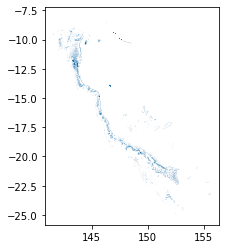

In [27]:
shx = gpd.read_file("../Data/Reefs/Reefs_GBR.shx")
shx.plot()

<AxesSubplot:>

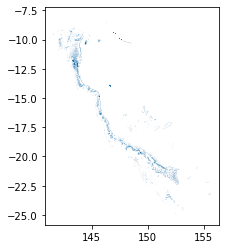

In [28]:
shape = gpd.read_file("../Data/Reefs/Reefs_GBR.shp")

shape.plot()

In [29]:
dbf = gpd.read_file("../Data/Reefs/Reefs_GBR.dbf")

# dbf.geometry (geoseries)
dbf.head()

,id,geometry
0,R000029,"POLYGON ((141.56196 -9.53949, 141.55818 -9.539..."
1,R000030,"POLYGON ((141.58334 -9.59231, 141.57877 -9.592..."
2,R000031,"POLYGON ((141.57196 -9.62410, 141.57181 -9.624..."
3,R000046,"POLYGON ((141.54224 -10.37799, 141.54203 -10.3..."
4,R000089,"POLYGON ((141.57953 -12.54231, 141.57026 -12.5..."


In [30]:
dbf.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['id', 'geometry'], dtype='object')
 Axis 1: RangeIndex(start=0, stop=5202, step=1)
 ObjectBlock: slice(0, 1, 1), 1 x 5202, dtype: object
 ExtensionBlock: slice(1, 2, 1), 1 x 5202, dtype: geometry,
 '_item_cache': {'geometry': 0       POLYGON ((141.56196 -9.53949, 141.55818 -9.539...
  1       POLYGON ((141.58334 -9.59231, 141.57877 -9.592...
  2       POLYGON ((141.57196 -9.62410, 141.57181 -9.624...
  3       POLYGON ((141.54224 -10.37799, 141.54203 -10.3...
  4       POLYGON ((141.57953 -12.54231, 141.57026 -12.5...
                                ...                        
  5197    POLYGON ((155.53334 -23.27021, 155.53334 -23.2...
  5198    POLYGON ((155.62003 -23.19231, 155.60992 -23.1...
  5199    POLYGON ((155.63086 -23.24231, 155.62435 -23.2...
  5200    POLYGON ((155.59379 -23.27082, 155.59362 -23.2...
  5201    POLYGON ((155.63334 -23.23671, 155.63334 -23.2...
  Name: geometry, Length: 5202, dtype: geometry},
 '_attrs':

In [69]:
def esriprj2standards(shapeprj_path):
   prj_file = open(shapeprj_path, 'r')
   prj_txt = prj_file.read()
   srs = osr.SpatialReference()
   srs.ImportFromESRI([prj_txt])
   return srs.ExportToProj4()
   

In [70]:
proj4 = esriprj2standards("../Data/Reefs/Reefs_GBR.prj")


##### Plot survey start points in Australia
Survey_AUS

In [72]:
gSurvey = gpd.GeoDataFrame(Survey_AUS, geometry = gpd.points_from_xy(Survey_AUS.lng_start, Survey_AUS.lat_start))

In [83]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

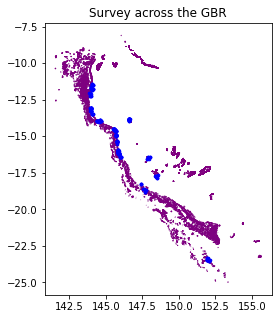

In [107]:

ax = shape.plot(figsize=(15, 5), edgecolor='purple')
ax.set_title("Start Survey across the GBR")
gSurvey.plot(ax = ax, color = 'blue',markersize=7)


### Adding SST (last measured) and DHW (last measured) // 2020.12

In [122]:
last_SST = SST[[SST.columns[0],SST.columns[-1]]]
last_DHW = DHW[[DHW.columns[0],DHW.columns[-1]]]

In [124]:
shape

,id,geometry
0,R000029,"POLYGON ((141.56196 -9.53949, 141.55818 -9.539..."
1,R000030,"POLYGON ((141.58334 -9.59231, 141.57877 -9.592..."
2,R000031,"POLYGON ((141.57196 -9.62410, 141.57181 -9.624..."
3,R000046,"POLYGON ((141.54224 -10.37799, 141.54203 -10.3..."
4,R000089,"POLYGON ((141.57953 -12.54231, 141.57026 -12.5..."
...,...,...
5197,R095224,"POLYGON ((155.53334 -23.27021, 155.53334 -23.2..."
5198,R095561,"POLYGON ((155.62003 -23.19231, 155.60992 -23.1..."
5199,R095562,"POLYGON ((155.63086 -23.24231, 155.62435 -23.2..."
5200,R095563,"POLYGON ((155.59379 -23.27082, 155.59362 -23.2..."


In [134]:
last_DHW

,id,2020.12
0,R000029,0.890000
1,R000030,0.997742
2,R000031,1.035161
3,R000046,1.117419
4,R000089,0.000000
...,...,...
5197,R095224,0.000000
5198,R095561,0.000000
5199,R095562,0.000000
5200,R095563,0.000000


In [145]:
last_DHW.rename(columns = {"2020.12": "DHW"}, inplace = True)
last_SST.rename(columns = {"2020.12": "SST"}, inplace = True)

In [147]:

SST_DHW = last_SST.merge(last_DHW, on = 'id')

In [149]:

GBR = shape.merge(SST_DHW, on ='id')

In [196]:
GBR

,id,geometry,SST,DHW
0,R000029,"POLYGON ((141.56196 -9.53949, 141.55818 -9.539...",30.110323,0.890000
1,R000030,"POLYGON ((141.58334 -9.59231, 141.57877 -9.592...",30.130645,0.997742
2,R000031,"POLYGON ((141.57196 -9.62410, 141.57181 -9.624...",30.143226,1.035161
3,R000046,"POLYGON ((141.54224 -10.37799, 141.54203 -10.3...",30.065161,1.117419
4,R000089,"POLYGON ((141.57953 -12.54231, 141.57026 -12.5...",29.982581,0.000000
...,...,...,...,...
5197,R095224,"POLYGON ((155.53334 -23.27021, 155.53334 -23.2...",25.959677,0.000000
5198,R095561,"POLYGON ((155.62003 -23.19231, 155.60992 -23.1...",26.019677,0.000000
5199,R095562,"POLYGON ((155.63086 -23.24231, 155.62435 -23.2...",25.988710,0.000000
5200,R095563,"POLYGON ((155.59379 -23.27082, 155.59362 -23.2...",25.962903,0.000000


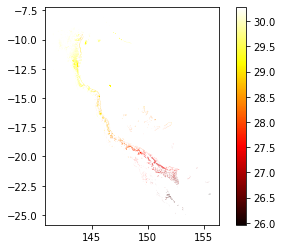

In [155]:
GBR.plot(cmap = 'hot', column = 'SST', legend = True)

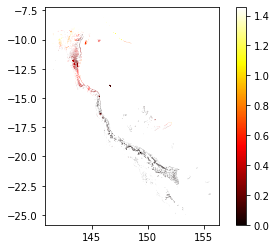

In [156]:
GBR.plot(cmap = 'hot', column = 'DHW', legend = True)

#### Trying to merge Copernicus files

In [183]:
import netCDF4 as nc
fn = '../Data/dataset-armor-3d-rep-monthly_1614847899407.nc'
ds = nc.Dataset(fn)

In [186]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    description: ARMOR3D REP CMEMS December 2020 Release
    Conventions: CF-1.0
    institution: CLS
    domain_name: GLO
    history: 2019-12-15 12:00:00 ARMOR3D REP - TSHUV Global Ocean Observation-based Product netCDF creation
    title: ARMOR3D REP - TSHUVMld Global Ocean Observation-based Product monthly average
    _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
    references:  
    comment: 
    source:  
    dimensions(sizes): time(37), depth(1), latitude(689), longitude(1440)
    variables(dimensions): int16 depth(depth), float32 latitude(latitude), int32 time(time), int16 so(time, depth, latitude, longitude), float32 longitude(longitude)
    groups: 


In [185]:
print(ds.__dict__)

{'description': 'ARMOR3D REP CMEMS December 2020 Release', 'Conventions': 'CF-1.0', 'institution': 'CLS', 'domain_name': 'GLO', 'history': '2019-12-15 12:00:00 ARMOR3D REP - TSHUV Global Ocean Observation-based Product netCDF creation', 'title': 'ARMOR3D REP - TSHUVMld Global Ocean Observation-based Product monthly average', '_CoordSysBuilder': 'ucar.nc2.dataset.conv.CF1Convention', 'references': ' ', 'comment': '', 'source': ' '}


In [189]:
print(ds['so'])

<class 'netCDF4._netCDF4.Variable'>
int16 so(time, depth, latitude, longitude)
    _FillValue: 32767
    add_offset: 20.0
    long_name: salinity
    scale_factor: 0.001
    standard_name: sea_water_salinity
    unit_long: practical salinity unit
    units: 0.001
    _ChunkSizes: [  1  25 345 720]
unlimited dimensions: 
current shape = (37, 1, 689, 1440)
filling on


In [190]:
salinity = ds['so'][:]

In [191]:
salinity

masked_array(
  data=[[[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]]],


        [[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]]],


        [[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]]],


        ...,


        [[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [31.105, 31.105, 31.106, ...